<a href="https://colab.research.google.com/github/babupallam/Deep-Learning-DL-01-Introduction-to-Neural-Networks/blob/main/03_NN_Backpropagation_and_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Backpropagation and Optimization

- Backpropagation and optimization are critical components in the training of neural networks.
- They work together to fine-tune the parameters (weights and biases) of the network to minimize the error in predictions.



## 2.1 Backpropagation

- Backpropagation is a supervised learning algorithm used for training feedforward neural networks.
- It is a method for calculating the gradient of the loss function with respect to the weights of the network, which is then used to update the weights in order to minimize the loss.



### 2.1.1 Phases of Back Propogation

#### 2.1.1.1 Forward Pass

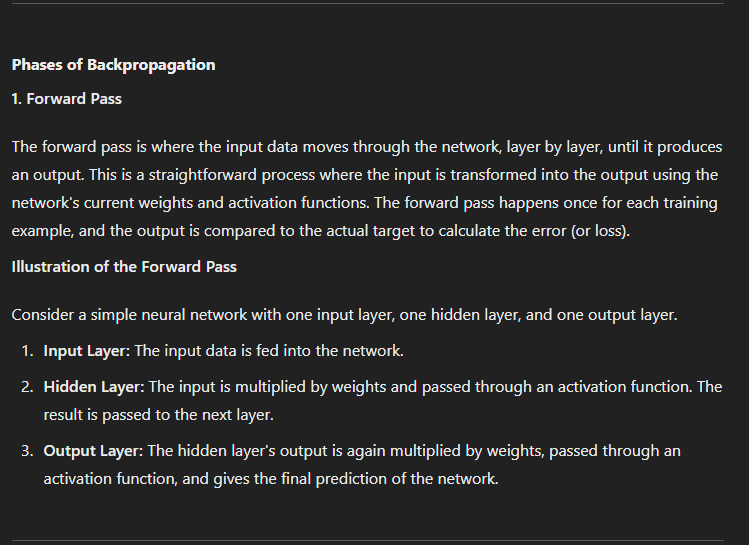

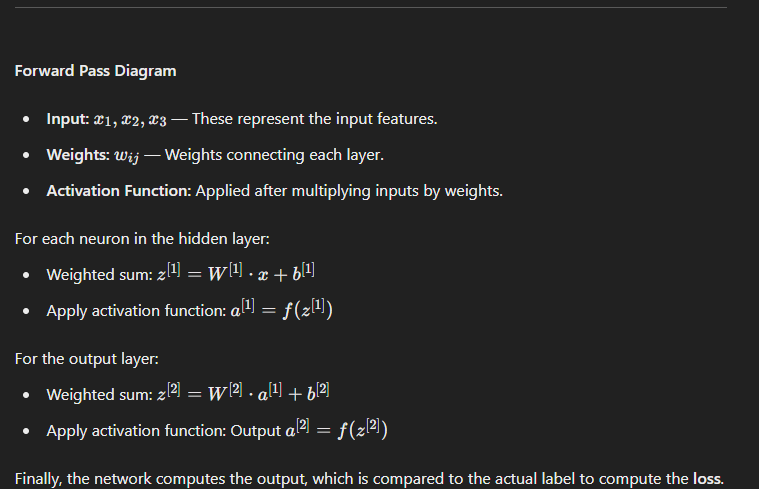

#### 2.1.1.2 Backward Pass

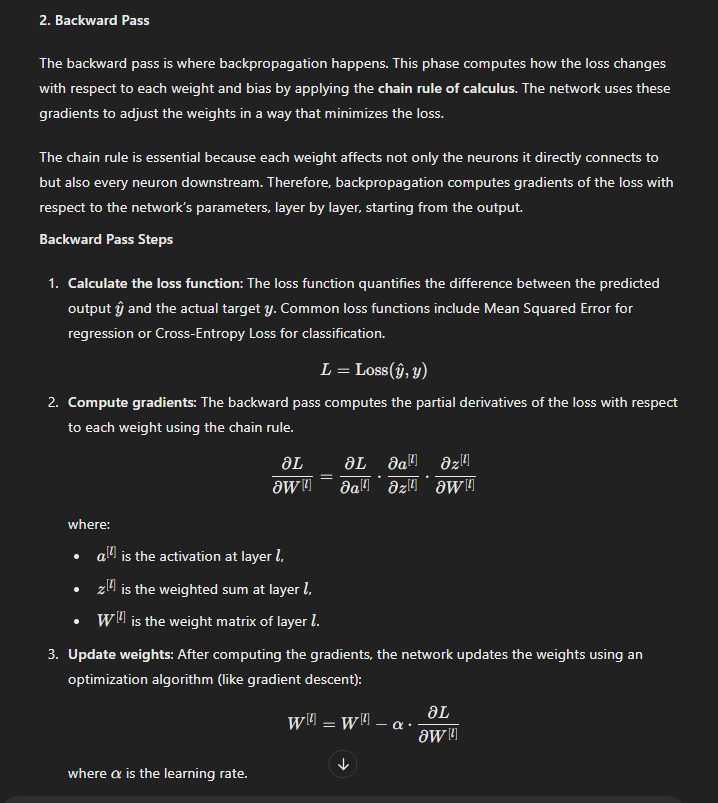

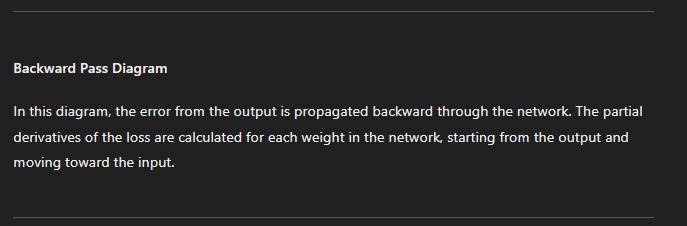

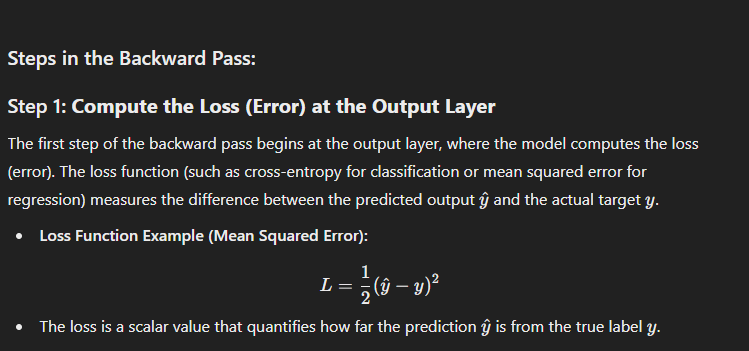

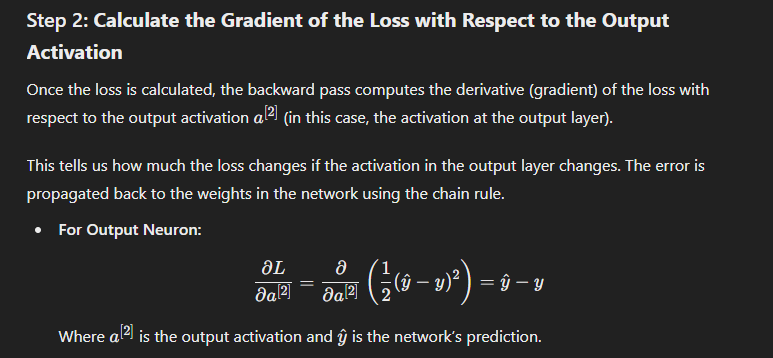

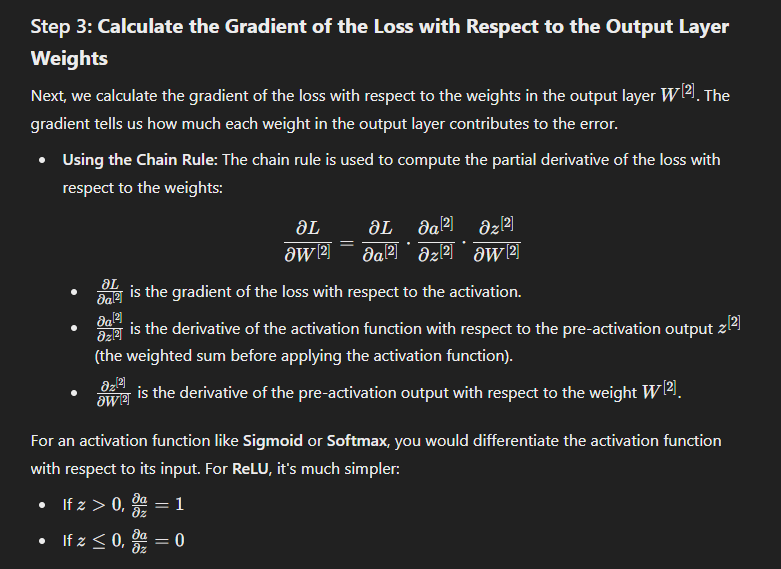

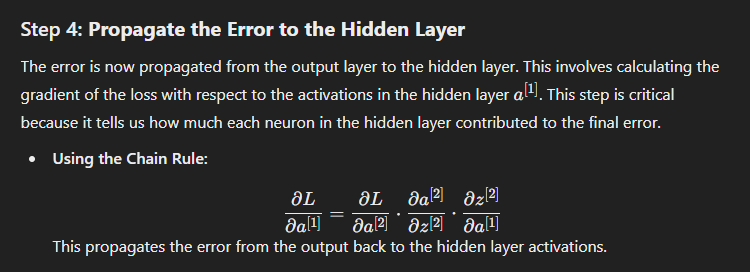

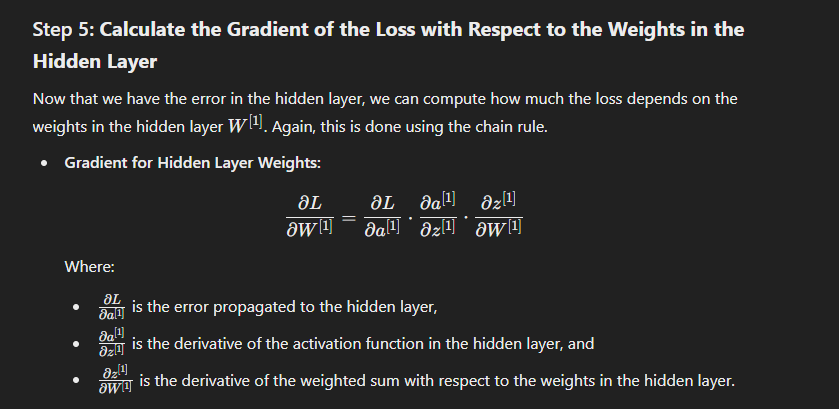

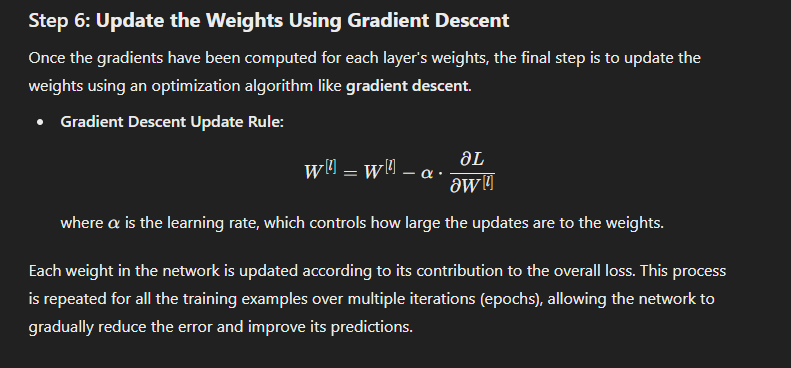

### 2.1.2 Steps of the Backward Pass in a Neural Network with Multiple Hidden Layers




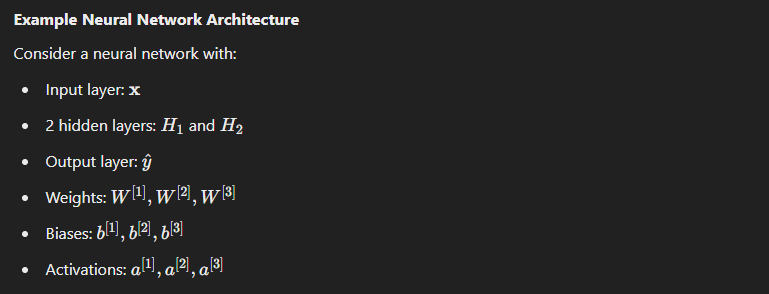

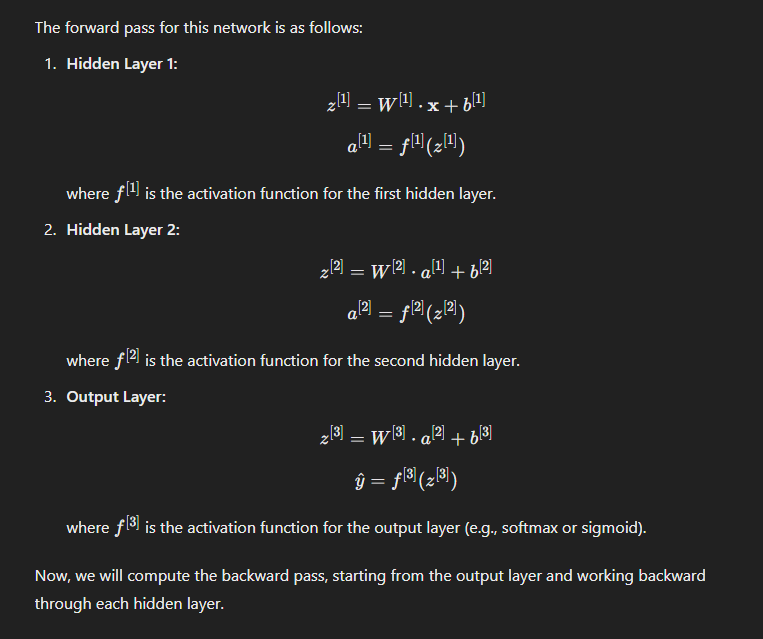

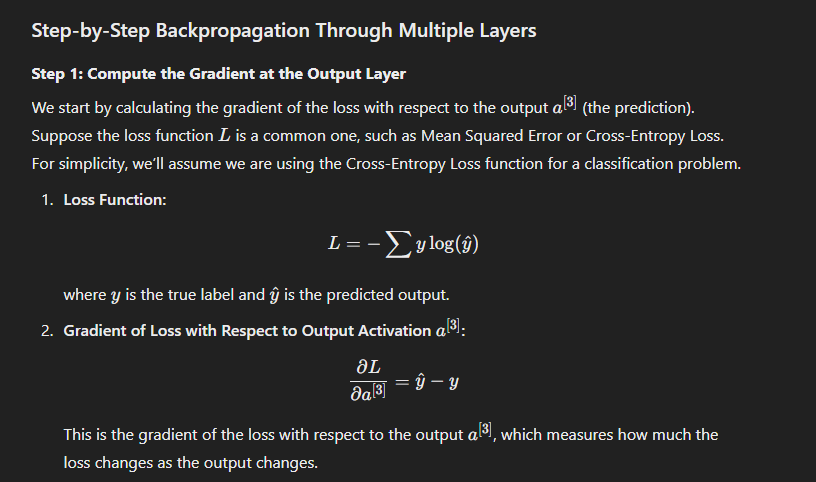

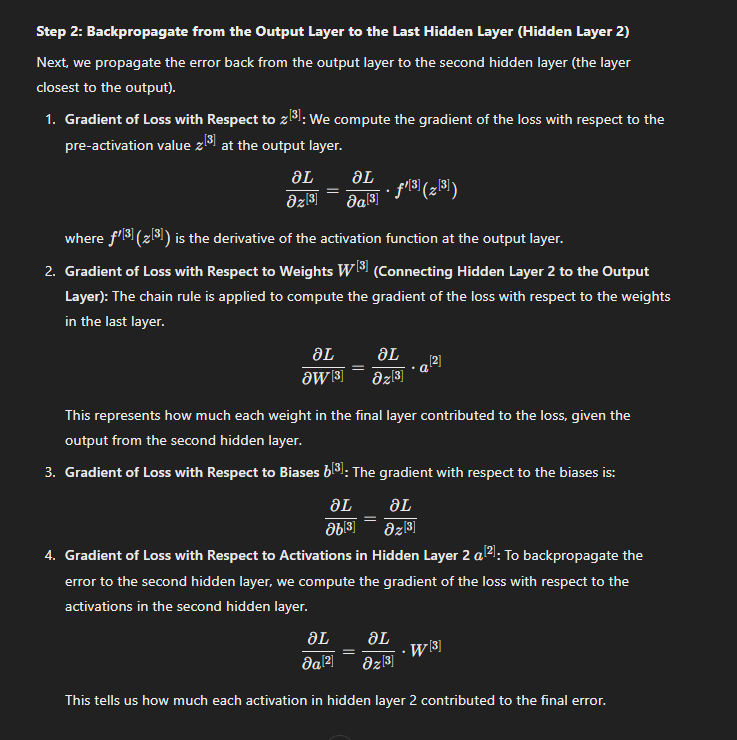

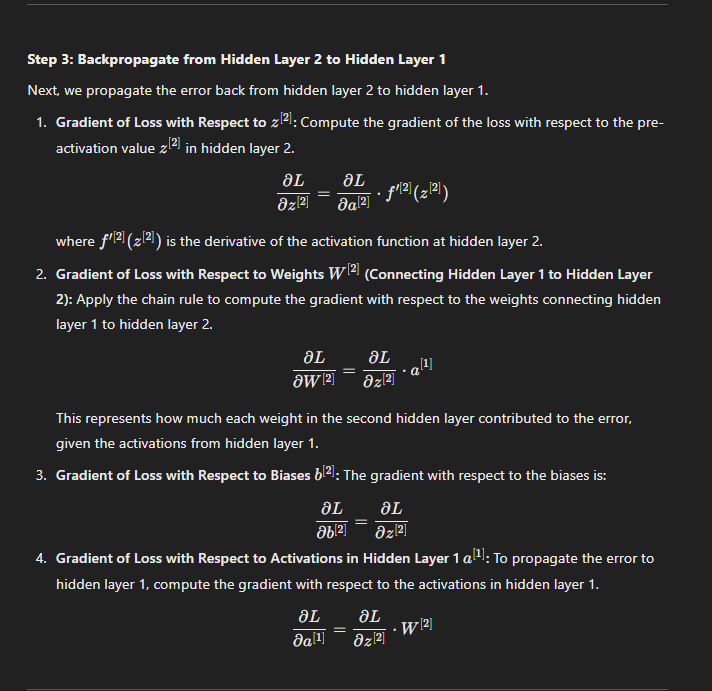

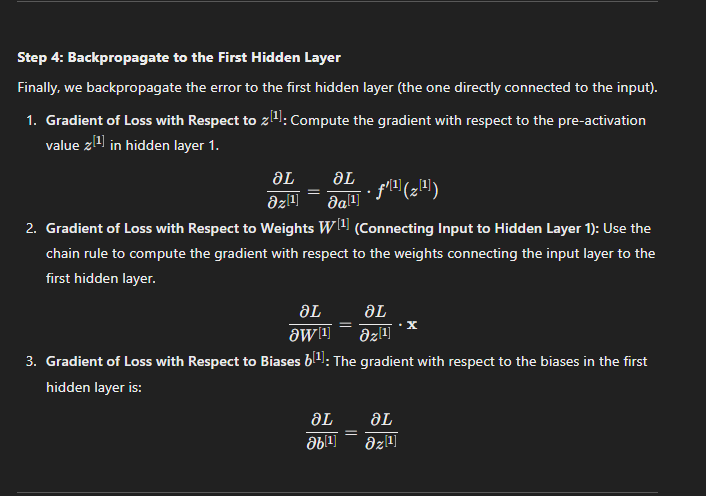

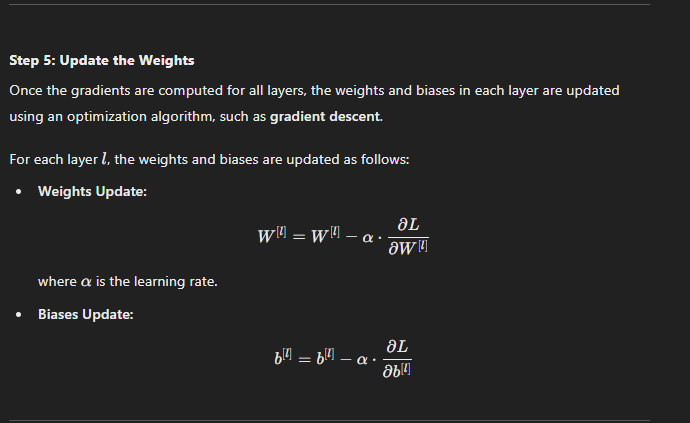

### 2.1.3 Chain Rule and Gradients in Back Propogation

The chain rule of calculus is the core mathematical principle behind backpropagation in neural networks. It allows us to compute the gradient (or partial derivative) of a composite function, which is crucial for updating the network’s weights during training. Since a neural network can be viewed as a series of composite functions (each layer being one function), the chain rule is used to break down the complex function into smaller, manageable derivatives.



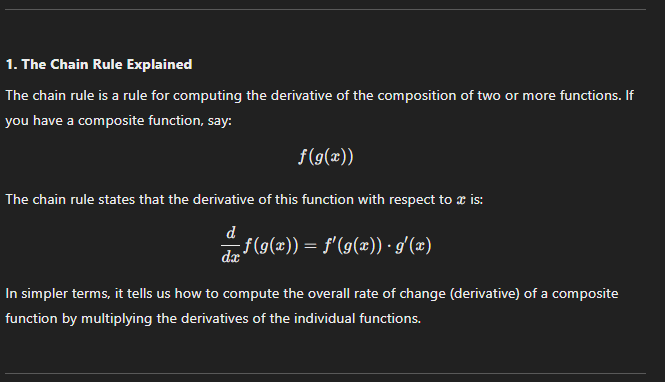

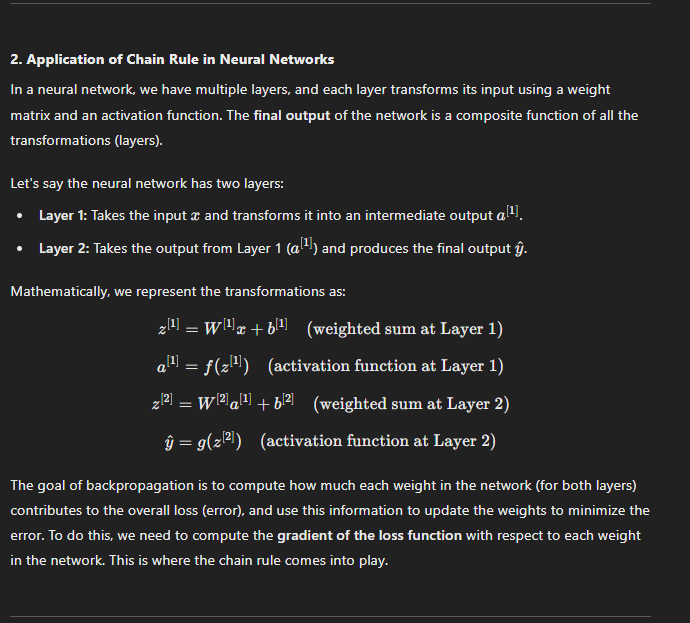

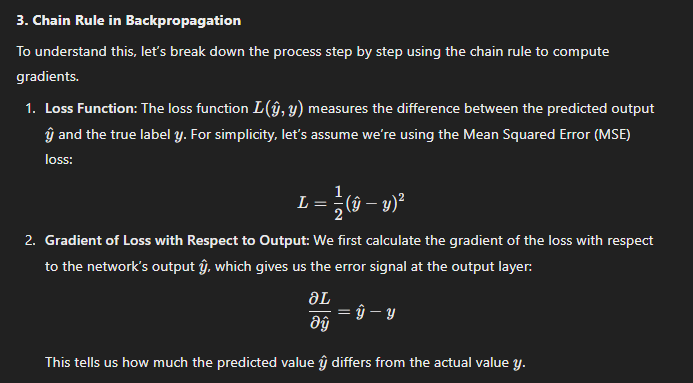

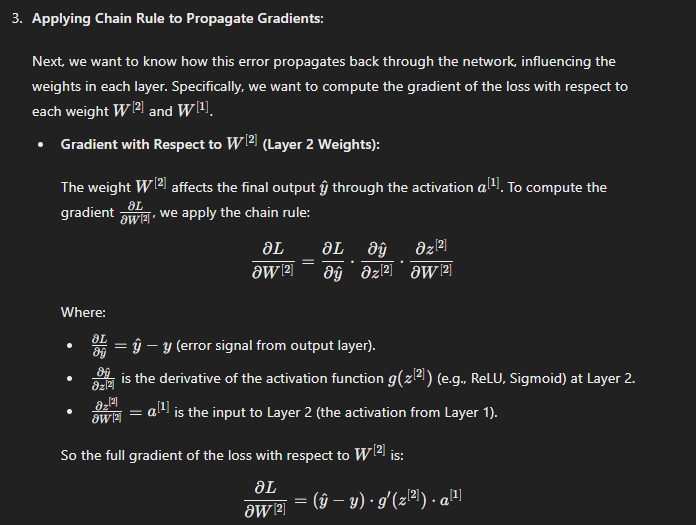

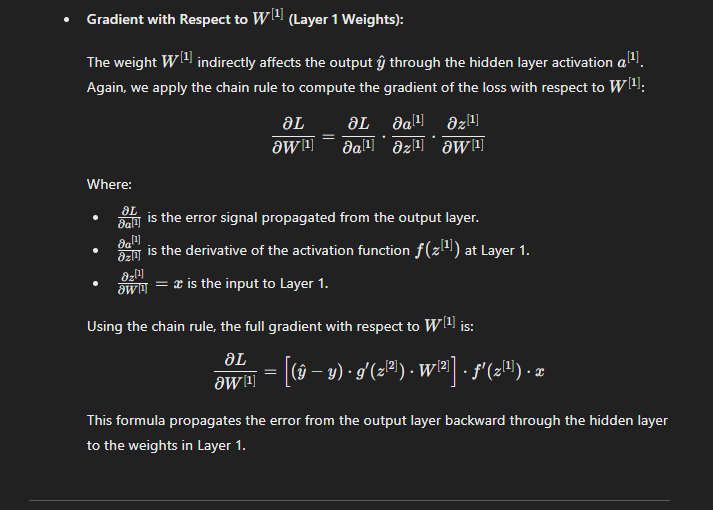

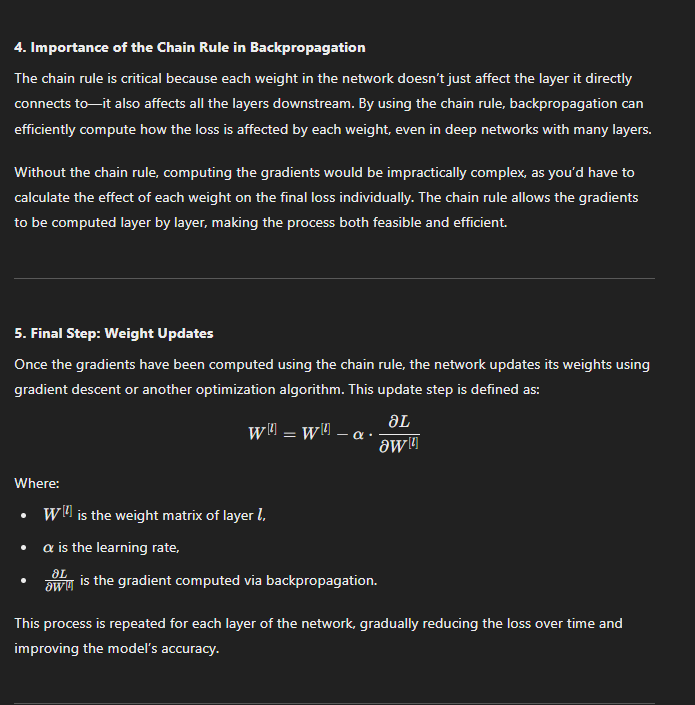

### 2.1.4: Challenges and Solutions in Back Propogation

- Backpropagation is a powerful algorithm for training neural networks, but it is not without its challenges.
- As networks become deeper and more complex, several issues can arise, such as vanishing gradients, exploding gradients, and overfitting.

#### 2.1.4.1 Vanishing Gradients


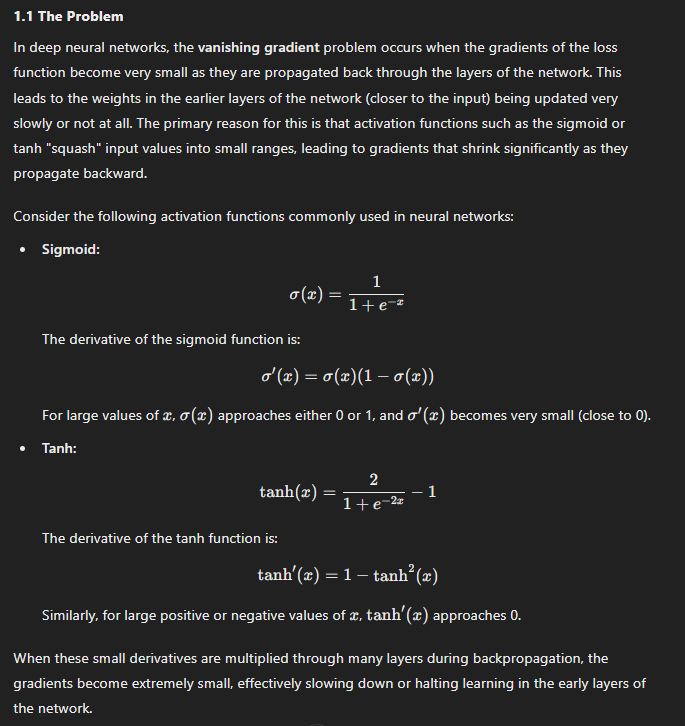

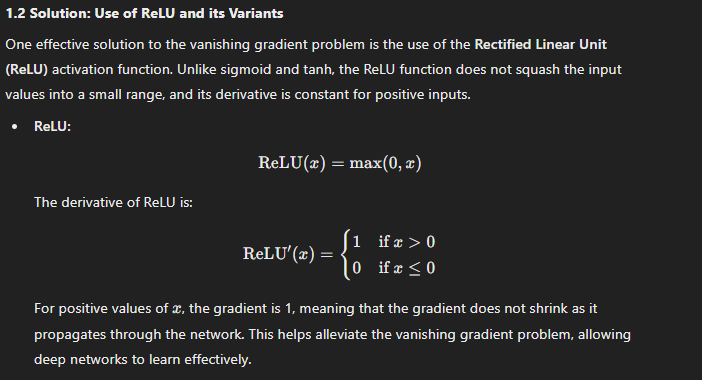

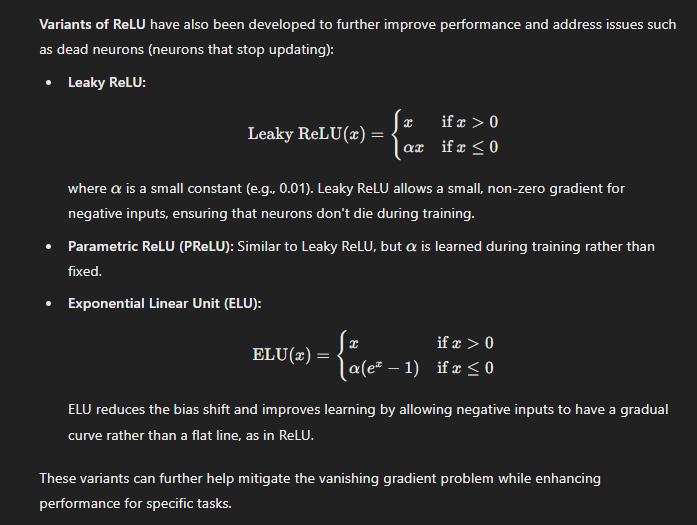

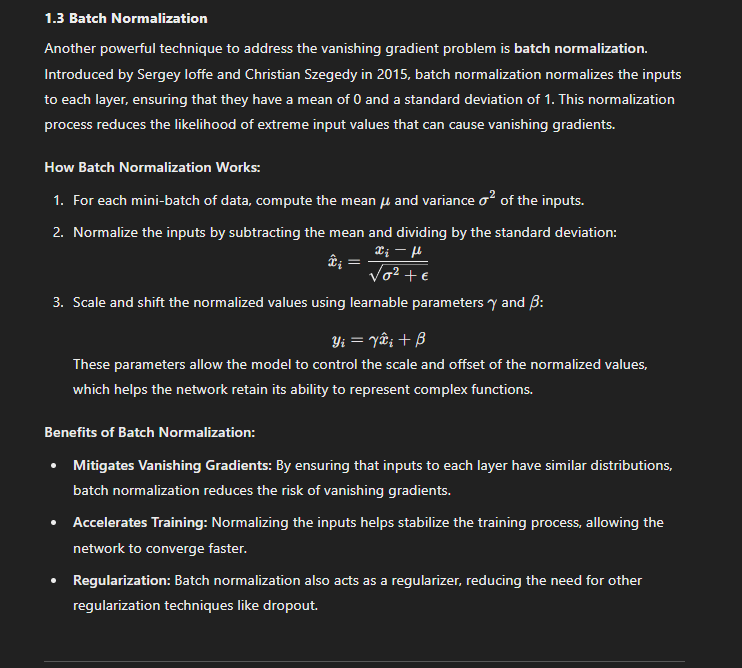

#### 2.1.4.2 Exploding Gradients


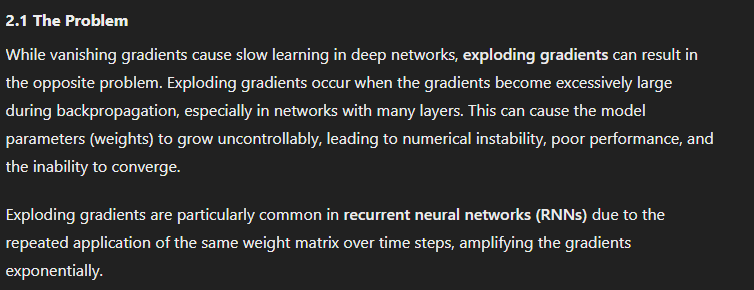

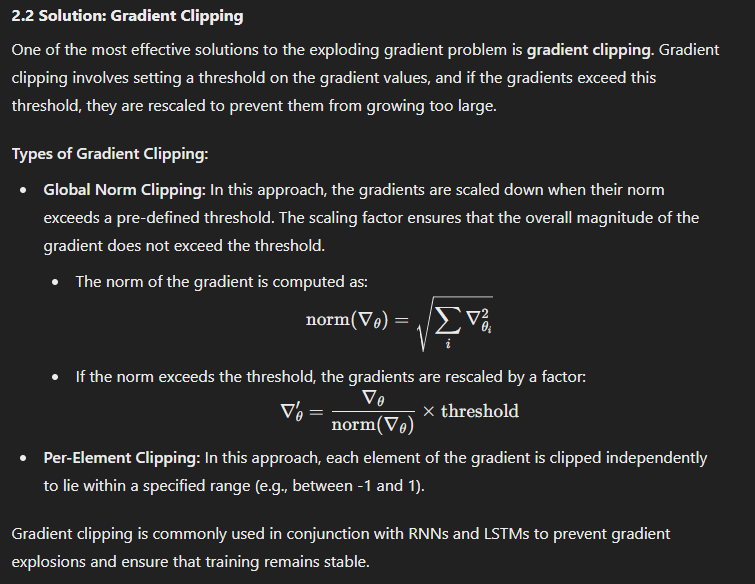

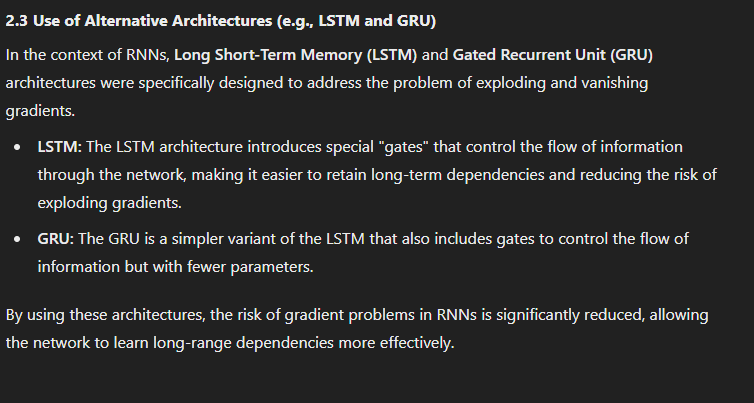

#### 2.1.4.3 Overfitting

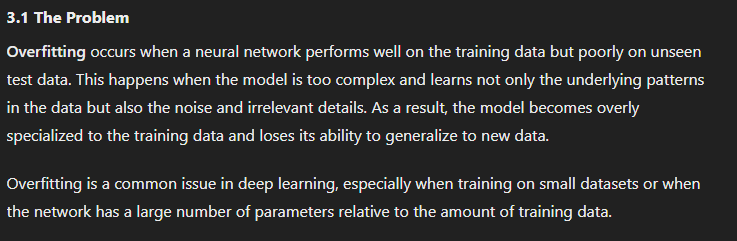

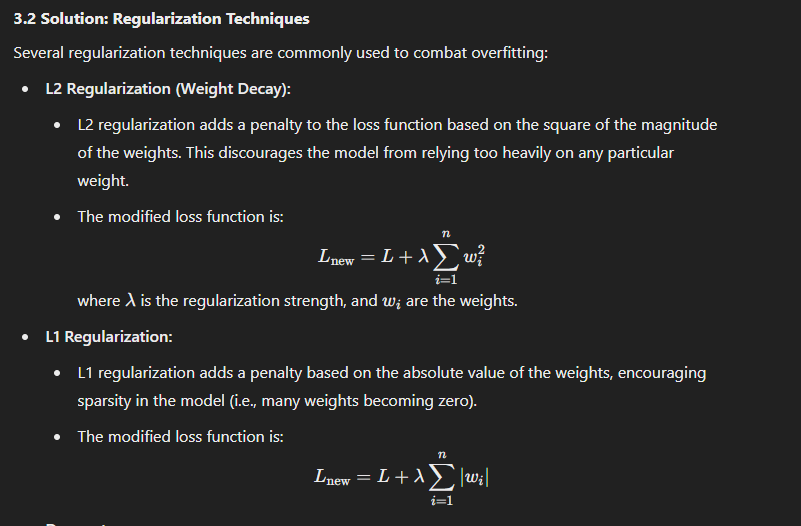

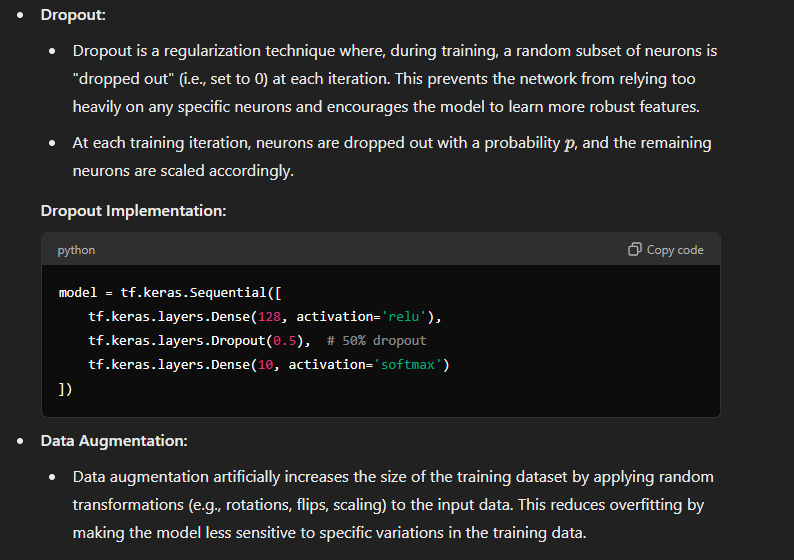

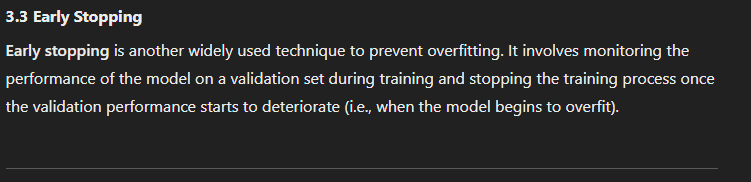

## 2.2: Optimization Techniques


- Optimization techniques in neural networks are essential for finding the optimal set of parameters (weights and biases) that minimize the loss function during the training process.
- The effectiveness of these techniques is pivotal to the convergence speed and performance of a model. Below is a detailed report on various optimization techniques used in neural networks, including basic gradient descent and advanced methods like Momentum, Adam, and others.



### 2.2.1 Gradient Descent


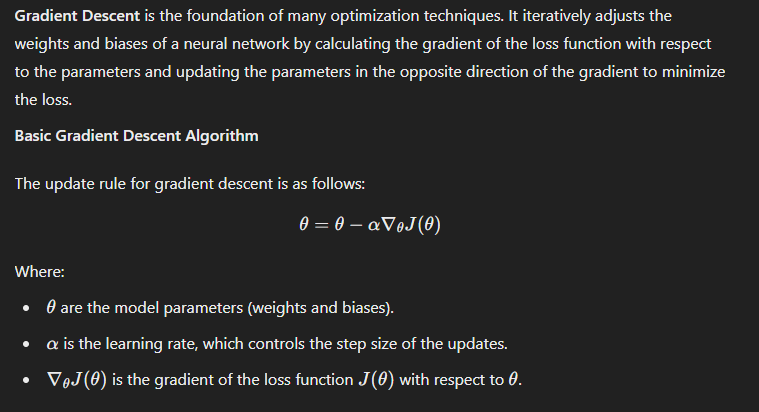

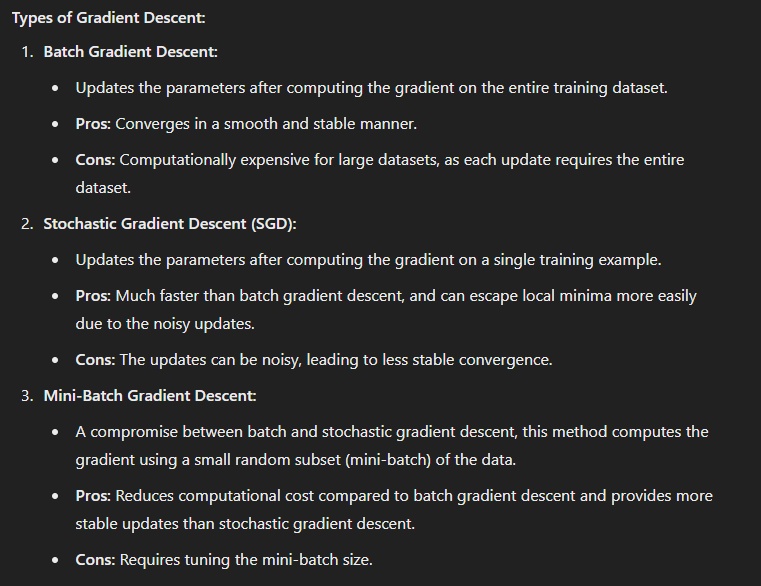

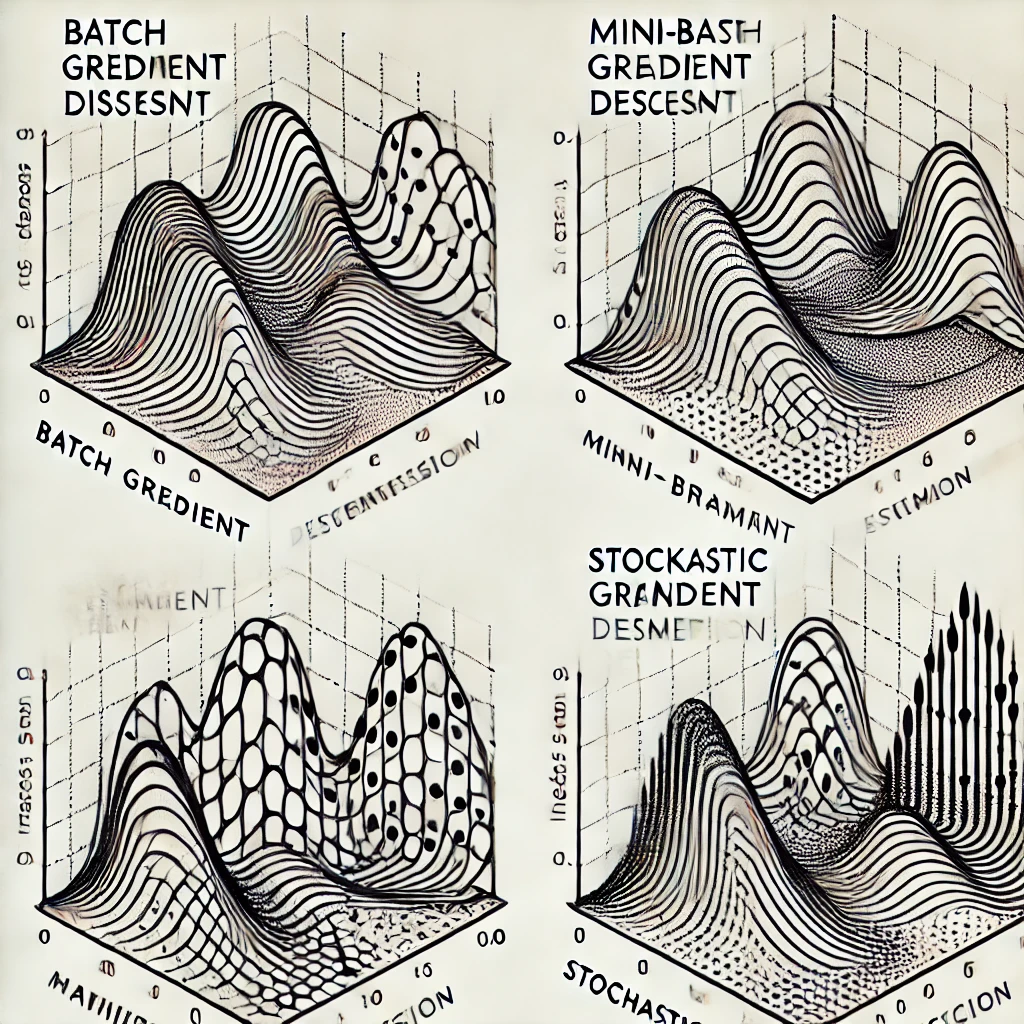

### 2.3.2 Advanced Optimization Algorithms

While gradient descent forms the basis of optimization, several advanced algorithms build upon it to address its limitations. These algorithms aim to enhance convergence speed, stability, and overall model performance.



#### 2.3.2.1. Momentum


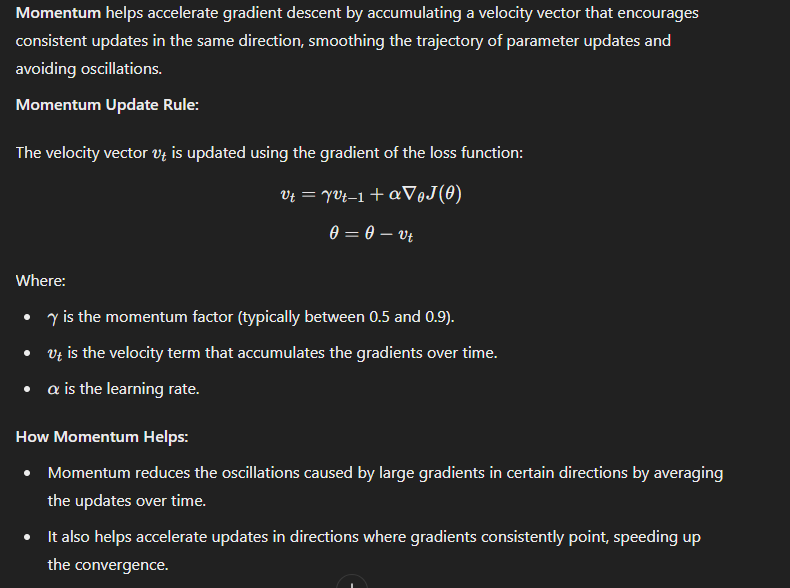

#### 2.3.2.2 Nesterov Accelerated Gradient (NAG)

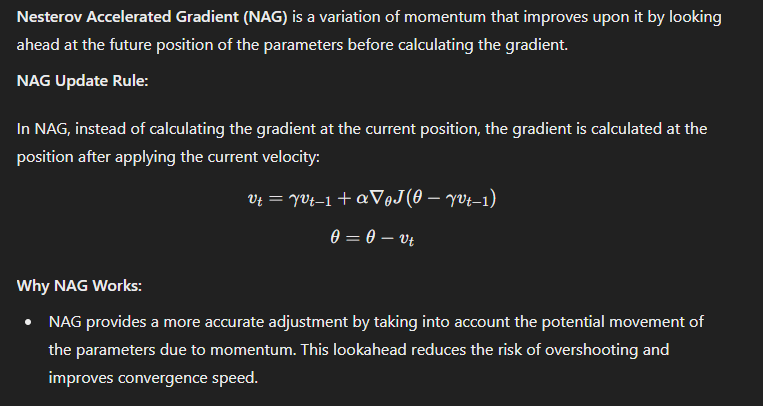

#### 2.3.2.3. RMSprop (Root Mean Square Propagation)

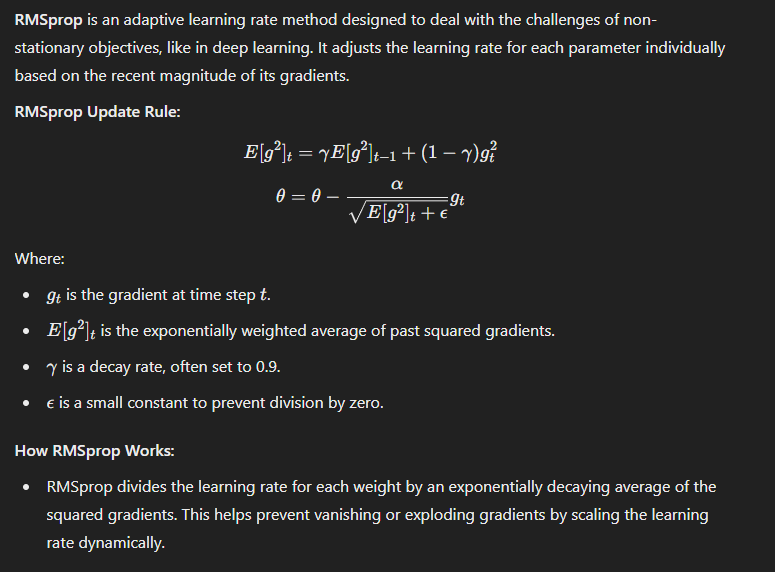

#### 2.3.2.4 Adam (Adaptive Moment Estimation)

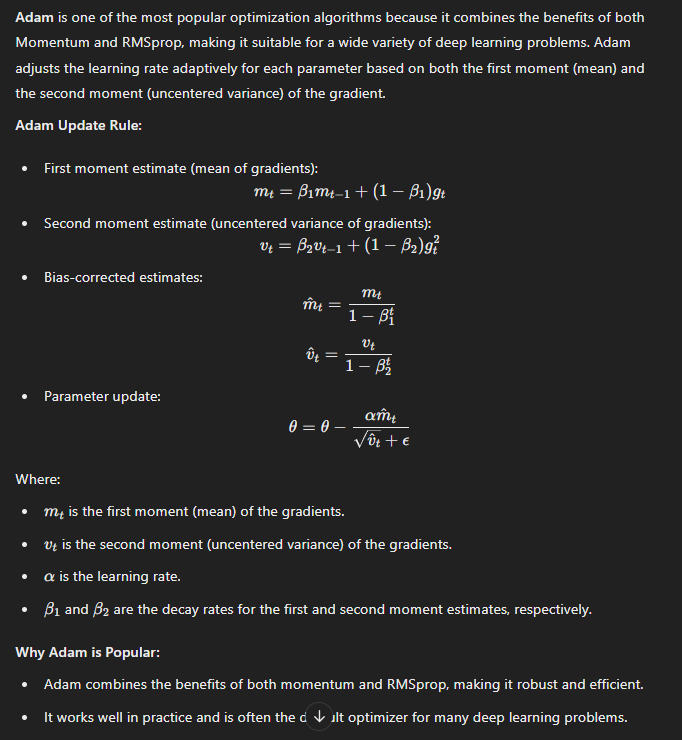

#### 2.3.2.5  Learning Rate Schedulers

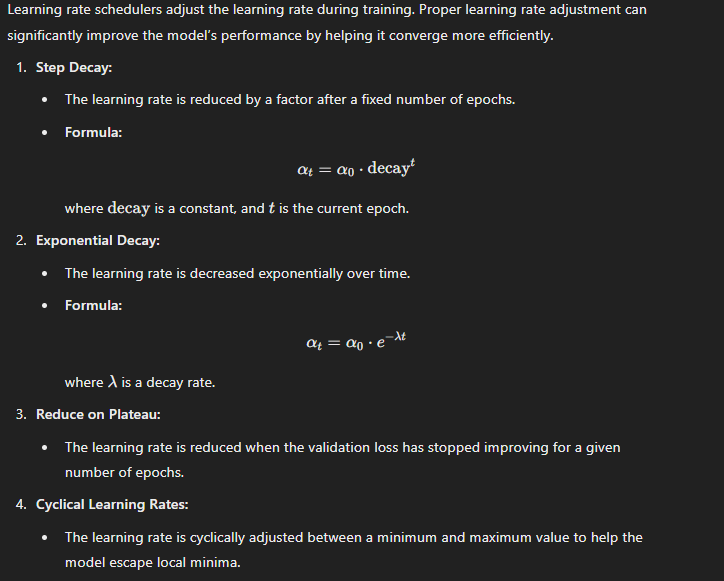

## 2.3: Demo 1:  Implementation in NN for AND Operation


Step 1: Network Architecture


In [1]:
import numpy as np

# Define the architecture of the neural network
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01  # Weights for input -> hidden
        self.b1 = np.zeros((1, hidden_size))  # Bias for hidden layer
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01  # Weights for hidden -> output
        self.b2 = np.zeros((1, output_size))  # Bias for output layer

    # Sigmoid activation function
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    # Derivative of sigmoid for backpropagation
    def sigmoid_derivative(self, z):
        return z * (1 - z)


Here, W1 and b1 represent the weights and biases between the input layer and hidden layer, and W2 and b2 are for the hidden layer to output layer connections. We use the sigmoid activation function for simplicity.

Step 2: Forward Pass

The forward pass computes the output of the network given an input. We'll compute the dot product between inputs and weights, apply the activation function, and then compute the final output.



In [2]:
class NeuralNetwork(NeuralNetwork):
    def forward(self, X):
        # Input -> Hidden
        self.Z1 = np.dot(X, self.W1) + self.b1  # Linear combination
        self.A1 = self.sigmoid(self.Z1)  # Apply activation function

        # Hidden -> Output
        self.Z2 = np.dot(self.A1, self.W2) + self.b2  # Linear combination
        self.A2 = self.sigmoid(self.Z2)  # Output of the network
        return self.A2


- Z1: Linear combination of inputs and weights for the hidden layer.
- A1: Activation after applying the sigmoid function on the hidden layer.
- Z2: Linear combination of the hidden layer output and the weights for the output layer.
- A2: The final output (predicted value).


Step 3: Loss Calculation (Mean Squared Error)


The loss function measures how well the network’s predictions match the true values. We'll use the Mean Squared Error (MSE) here.



In [3]:
class NeuralNetwork(NeuralNetwork):
    def compute_loss(self, Y, Y_hat):
        # MSE loss
        m = Y.shape[0]
        loss = (1/m) * np.sum((Y - Y_hat) ** 2)
        return loss


Step 4: Backward Pass (Backpropagation)


The backward pass calculates how much each weight and bias contributed to the error (loss), so we can adjust them accordingly. This is the essence of backpropagation.



In [4]:
class NeuralNetwork(NeuralNetwork):
    def backward(self, X, Y):
        m = Y.shape[0]

        # Output layer error (dZ2)
        dZ2 = self.A2 - Y
        dW2 = (1/m) * np.dot(self.A1.T, dZ2)  # Gradient of W2
        db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)  # Gradient of b2

        # Hidden layer error (dZ1)
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.sigmoid_derivative(self.A1)  # Gradient for hidden layer
        dW1 = (1/m) * np.dot(X.T, dZ1)  # Gradient of W1
        db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)  # Gradient of b1

        # Store gradients to use in optimization
        self.dW1, self.db1, self.dW2, self.db2 = dW1, db1, dW2, db2


- dZ2: Error in the output layer.
- dW2: Gradient of the loss with respect to the weights from hidden to output.
- db2: Gradient of the loss with respect to the biases of the output layer.
- dZ1: Error propagated back to the hidden layer.
- dW1: Gradient of the loss with respect to the weights from input to hidden.
- db1: Gradient of the loss with respect to the biases of the hidden layer.

Step 5: Optimization (Gradient Descent and Adam)


We now update the weights and biases using the gradients computed from backpropagation. here we use both Gradient Descent and Adam Optimizer for this step.



In [5]:
class NeuralNetwork(NeuralNetwork):
    def update_parameters(self, learning_rate):
        # Gradient descent update rule
        self.W1 -= learning_rate * self.dW1
        self.b1 -= learning_rate * self.db1
        self.W2 -= learning_rate * self.dW2
        self.b2 -= learning_rate * self.db2


In [6]:
class AdamOptimizer:
    def __init__(self, params, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.params = params
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = {param: np.zeros_like(param) for param in params}
        self.v = {param: np.zeros_like(param) for param in params}
        self.t = 0

    def update(self, grads):
        self.t += 1
        for param in self.params:
            self.m[param] = self.beta1 * self.m[param] + (1 - self.beta1) * grads[param]
            self.v[param] = self.beta2 * self.v[param] + (1 - self.beta2) * (grads[param] ** 2)

            # Bias correction
            m_hat = self.m[param] / (1 - self.beta1 ** self.t)
            v_hat = self.v[param] / (1 - self.beta2 ** self.t)

            # Update parameters
            self.params[param] -= self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)


 Step 6: Training Loop


This loop trains the neural network over multiple epochs, adjusting weights and biases using either gradient descent or an advanced optimizer like Adam.



In [7]:
# Training function
def train(X, Y, nn, optimizer, epochs=1000, learning_rate=0.01):
    for i in range(epochs):
        # Forward pass
        Y_hat = nn.forward(X)

        # Compute loss
        loss = nn.compute_loss(Y, Y_hat)

        # Backward pass
        nn.backward(X, Y)

        # Update parameters using Gradient Descent
        nn.update_parameters(learning_rate)

        if i % 100 == 0:
            print(f'Epoch {i}, Loss: {loss}')


Step 7: Training A Simple Dataset

In [8]:
# Create a simple dataset (AND gate logic)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input features
Y = np.array([[0], [0], [0], [1]])  # AND gate outputs

# Initialize the neural network and train it
nn = NeuralNetwork(input_size=2, hidden_size=2, output_size=1)
train(X, Y, nn, optimizer=None, epochs=1000, learning_rate=0.1)


Epoch 0, Loss: 0.24811800720660465
Epoch 100, Loss: 0.18632968788053875
Epoch 200, Loss: 0.18343241190299353
Epoch 300, Loss: 0.17873852550834568
Epoch 400, Loss: 0.17128867054126667
Epoch 500, Loss: 0.16102247864030775
Epoch 600, Loss: 0.14862420459131112
Epoch 700, Loss: 0.13479800344364506
Epoch 800, Loss: 0.1200029721666251
Epoch 900, Loss: 0.10462485633653314


Step 8: Test the model using input

In [11]:

# Testing the network after training
for x in X:
    prediction = nn.forward(x.reshape(1, -1))
    print(f"Input: {x}, Predicted Output: {prediction}, Rounded Output: {np.round(prediction)}")


Input: [0 0], Predicted Output: [[0.04605517]], Rounded Output: [[0.]]
Input: [0 1], Predicted Output: [[0.19484599]], Rounded Output: [[0.]]
Input: [1 0], Predicted Output: [[0.19515712]], Rounded Output: [[0.]]
Input: [1 1], Predicted Output: [[0.46244401]], Rounded Output: [[0.]]


Observation: output is wrong

Step 9: Train for more number of epoch and test the model with an input

In [12]:
# Define input data (AND gate logic)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input features
Y = np.array([[0], [0], [0], [1]])  # AND gate outputs (expected output)

# Initialize the neural network
nn = NeuralNetwork(input_size=2, hidden_size=2, output_size=1)

# Train the network with gradient descent
train(X, Y, nn, optimizer=None, epochs=10000, learning_rate=0.1)

# Testing the network after training
for x in X:
    prediction = nn.forward(x.reshape(1, -1))
    print(f"Input: {x}, Predicted Output: {prediction}, Rounded Output: {np.round(prediction)}")


Epoch 0, Loss: 0.24933847652458005
Epoch 100, Loss: 0.18658527152102572
Epoch 200, Loss: 0.1838999845562757
Epoch 300, Loss: 0.1795732144111881
Epoch 400, Loss: 0.17258245536929084
Epoch 500, Loss: 0.1627237468356064
Epoch 600, Loss: 0.15061098958616428
Epoch 700, Loss: 0.13697580800469858
Epoch 800, Loss: 0.12230807437222327
Epoch 900, Loss: 0.10699170135899541
Epoch 1000, Loss: 0.091502227666284
Epoch 1100, Loss: 0.0764657162981238
Epoch 1200, Loss: 0.06255106931642342
Epoch 1300, Loss: 0.05028998262202432
Epoch 1400, Loss: 0.03995429961401015
Epoch 1500, Loss: 0.03154887807338024
Epoch 1600, Loss: 0.02488900821101285
Epoch 1700, Loss: 0.019699064714063068
Epoch 1800, Loss: 0.015689168230463006
Epoch 1900, Loss: 0.012598283939271902
Epoch 2000, Loss: 0.010210630584114103
Epoch 2100, Loss: 0.008356530755161129
Epoch 2200, Loss: 0.006906361277868346
Epoch 2300, Loss: 0.005762629105906986
Epoch 2400, Loss: 0.004852513229890182
Epoch 2500, Loss: 0.004121688777558351
Epoch 2600, Loss: 0.0

Observation: for 1 and 1 the output found to be 1. this is currect input...

The model should correctly predict that only the input [1, 1] yields an output of 1, and all other inputs yield 0.

## 2.4. Demo 2: NN for Predicting Student Performace

Problem: Predict whether a student will pass (output: 1) or fail (output: 0) based on the number of hours they studied.

### Step 1: Creating the Dataset


In [14]:
import numpy as np

# Input data: hours studied
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])

# Output data: 0 = fail, 1 = pass (label for each student)
Y = np.array([[0], [0], [0], [0], [1], [1], [1], [1], [1], [1]])


This dataset assumes:

- A student fails if they studied less than or equal to 4 hours.
- A student passes if they studied 5 hours or more.

### Step 2: Neural Network Architecture


We will create a simple neural network with:

- Input layer: 1 input neuron (hours studied)
- Hidden layer: 3 neurons
- Output layer: 1 output neuron (predicts pass/fail)

In [18]:
import numpy as np

# Define the architecture of the neural network
class SimpleNeuralNetwork:
#  We initialize random weights for each layer and set the biases to zero. The weights are multiplied by small random numbers to avoid any symmetry.
    def __init__(self, input_size, hidden_size, output_size):
        """
        Initialize the neural network with random weights and biases.
        Arguments:
        input_size: Number of features in the input (in this case, 1 feature: hours studied)
        hidden_size: Number of neurons in the hidden layer
        output_size: Number of neurons in the output layer (1 for binary classification)
        """
        # Initialize weights for input -> hidden layer
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01  # Small random numbers
        self.b1 = np.zeros((1, hidden_size))  # Biases initialized to zero for hidden layer

        # Initialize weights for hidden -> output layer
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01  # Small random numbers
        self.b2 = np.zeros((1, output_size))  # Biases initialized to zero for output layer

    #We use the sigmoid activation function to introduce non-linearity to the network. The sigmoid function outputs values between 0 and 1, suitable for binary classification.
    # Sigmoid activation function to introduce non-linearity
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    # Derivative of sigmoid function to calculate the gradients during backpropagation
    def sigmoid_derivative(self, z):
        return z * (1 - z)

    # Forward pass of the neural network
    def forward(self, X):
        """
        Perform the forward pass to compute the output of the network.
        Arguments:
        X: Input data (hours studied)
        Returns:
        A2: The predicted output (pass/fail probability)
        """
        # Input -> Hidden layer (Linear transformation + activation)
        self.Z1 = np.dot(X, self.W1) + self.b1  # Z1 = X * W1 + b1
        self.A1 = self.sigmoid(self.Z1)  # A1 = sigmoid(Z1), activation of hidden layer

        # Hidden -> Output layer (Linear transformation + activation)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2  # Z2 = A1 * W2 + b2
        self.A2 = self.sigmoid(self.Z2)  # A2 = sigmoid(Z2), output (predicted pass/fail probability)

        return self.A2  # Return the predicted output


### Step 3: Loss Calculation (Binary Cross-Entropy)


In [35]:

 #The binary cross-entropy loss function is used to measure how well the model's predictions match the actual labels. It is the standard loss function for binary classification tasks.

class SimpleNeuralNetwork(SimpleNeuralNetwork):
  # Loss function: Binary Cross-Entropy
  def compute_loss(self, Y, Y_hat):
      """
      Compute the loss using binary cross-entropy. It measures how close the predicted output is to the actual output.
      Arguments:
      Y: True labels (0 or 1, pass/fail)
      Y_hat: Predicted output (probabilities)
      Returns:
      loss: The calculated loss value
      """
      m = Y.shape[0]  # Number of training examples
      loss = -(1/m) * np.sum(Y * np.log(Y_hat) + (1 - Y) * np.log(1 - Y_hat))  # Binary Cross-Entropy
      return loss


### Step 4: Backward Pass (Backpropagation)


In [37]:
#In this step, we calculate the gradients of the loss function with respect to the weights and biases using backpropagation. These gradients are used to update the parameters in the optimization step.

class SimpleNeuralNetwork(SimpleNeuralNetwork):
  # Backward pass: Backpropagation
  def backward(self, X, Y):
      """
      Perform the backward pass to compute the gradients of the loss with respect to the weights and biases.
      Arguments:
      X: Input data (hours studied)
      Y: True labels (pass/fail)
      """
      m = X.shape[0]  # Number of training examples

      # Compute the gradient of the loss with respect to Z2 (output layer error)
      dZ2 = self.A2 - Y  # dZ2 = A2 - Y
      dW2 = (1/m) * np.dot(self.A1.T, dZ2)  # dW2 = A1.T * dZ2
      db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)  # db2 = Sum of dZ2

      # Compute the gradient of the loss with respect to Z1 (hidden layer error)
      dA1 = np.dot(dZ2, self.W2.T)  # Backpropagate error to hidden layer
      dZ1 = dA1 * self.sigmoid_derivative(self.A1)  # dZ1 = dA1 * sigmoid'(Z1)
      dW1 = (1/m) * np.dot(X.T, dZ1)  # dW1 = X.T * dZ1
      db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)  # db1 = Sum of dZ1

      # Store the gradients for weight and bias updates
      self.dW1, self.db1, self.dW2, self.db2 = dW1, db1, dW2, db2

  #Gradient Calculation:
  #dZ2: The error between the predicted and actual output.
  #dW2, db2: Gradients for the weights and biases between the hidden layer and output layer.
  #dZ1: Error propagated back to the hidden layer.
  #dW1, db1: Gradients for the weights and biases between the input and hidden layer.



### Step 5: Optimization (Gradient Descent)


In [38]:
#In this step, we update the weights and biases by subtracting the product of the learning rate and the computed gradients from the parameters.


#The learning rate controls how big the update step is; if it’s too large, the model may not converge, and if it’s too small, training will take too long.

class SimpleNeuralNetwork(SimpleNeuralNetwork):
  # Update weights and biases using gradient descent
  def update_parameters(self, learning_rate):
      """
      Update the weights and biases using gradient descent.
      Arguments:
      learning_rate: The learning rate for the gradient descent update
      """
      self.W1 -= learning_rate * self.dW1  # Update W1
      self.b1 -= learning_rate * self.db1  # Update b1
      self.W2 -= learning_rate * self.dW2  # Update W2
      self.b2 -= learning_rate * self.db2  # Update b2


### Step 6: Training Loop


In [40]:
# The training loop iterates over a specified number of epochs.
# For each epoch,
    # 1. it performs a forward pass,
    # 2. computes the loss,
    # 3. performs a backward pass to calculate gradients, and
    # 4. updates the weights using gradient descent.

class SimpleNeuralNetwork(SimpleNeuralNetwork):

  # Function to train the model
  def train(X, Y, nn, epochs=1000, learning_rate=0.01):
      """
      Train the neural network for a specified number of epochs using the training data.
      Arguments:
      X: Input data (hours studied)
      Y: True labels (pass/fail)
      nn: The neural network instance
      epochs: Number of training iterations
      learning_rate: Learning rate for gradient descent
      """
      for i in range(epochs):
          # Forward pass: compute predictions
          Y_hat = nn.forward(X)

          # Compute the loss
          loss = nn.compute_loss(Y, Y_hat)

          # Backward pass: compute gradients
          nn.backward(X, Y)

          # Update weights and biases using gradient descent
          nn.update_parameters(learning_rate)

          # The loss is printed every 100 epochs to monitor the progress.
          # Print the loss every 100 epochs for monitoring
          if i % 100 == 0:
              print(f'Epoch {i}, Loss: {loss}')


### 7. Training the model

In [44]:
# Initialize the neural network
nn = SimpleNeuralNetwork(input_size=1, hidden_size=3, output_size=1)

# Train the network
train(X, Y, nn, epochs=10000, learning_rate=0.1)


Epoch 0, Loss: 0.6952091167950981
Epoch 100, Loss: 0.6442631542403453
Epoch 200, Loss: 0.6130182086095323
Epoch 300, Loss: 0.5744898923278818
Epoch 400, Loss: 0.5256337848924706
Epoch 500, Loss: 0.46599609774682405
Epoch 600, Loss: 0.4008607210931137
Epoch 700, Loss: 0.33884747572012547
Epoch 800, Loss: 0.2860500608197607
Epoch 900, Loss: 0.24387633489293084
Epoch 1000, Loss: 0.21096396069980333
Epoch 1100, Loss: 0.18525729956465353
Epoch 1200, Loss: 0.16492937565189292
Epoch 1300, Loss: 0.1485853153616465
Epoch 1400, Loss: 0.13521437622191654
Epoch 1500, Loss: 0.12409369100871354
Epoch 1600, Loss: 0.11470419136886958
Epoch 1700, Loss: 0.10666880940706613
Epoch 1800, Loss: 0.09970958841333283
Epoch 1900, Loss: 0.09361842155197567
Epoch 2000, Loss: 0.08823708354054605
Epoch 2100, Loss: 0.08344349078265993
Epoch 2200, Loss: 0.07914213314364614
Epoch 2300, Loss: 0.07525731992558005
Epoch 2400, Loss: 0.07172834526208002
Epoch 2500, Loss: 0.06850597937022408
Epoch 2600, Loss: 0.065549887909

### Step 7: Testing the Model


In [45]:
# Testing the network after training
test_hours = np.array([[2], [4.5], [6], [9]])  # Testing new inputs (hours studied)
predictions = nn.forward(test_hours)

for i, hours in enumerate(test_hours):
    print(f"Hours Studied: {hours[0]}, Predicted Probability: {predictions[i][0]}, Pass/Fail: {np.round(predictions[i][0])}")


Hours Studied: 2.0, Predicted Probability: 0.0007885747775965169, Pass/Fail: 0.0
Hours Studied: 4.5, Predicted Probability: 0.5267075758176755, Pass/Fail: 1.0
Hours Studied: 6.0, Predicted Probability: 0.998599133599021, Pass/Fail: 1.0
Hours Studied: 9.0, Predicted Probability: 0.9997749346700388, Pass/Fail: 1.0
